# Exploratory Data Analysis in Python - Read, clean, and validate
> A Summary of lecture of Writing functions in Python, via datacamp

- toc: true
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp]
- image: my_icons/fastai_logo.png

## DataFrames and Series


### Exploring the NSFG data

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
nsfg = pd.read_hdf('/content/nsfg (1).hdf5', 'nsfg')

In [37]:
# Display the number of rows and columns
print(nsfg.shape)

# Display the names of the columns
print(nsfg.columns)

# Select columns birthwgt_oz1: ounces
ounces = nsfg['birthwgt_oz1']

# Print the first 5 elements of ounces
print(ounces.head(5))

(9358, 10)
Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')
0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


## Clean and Validate

### Clean a variable

In [38]:
nsfg['nbrnaliv'].value_counts()

,count
nbrnaliv,
1.0,6379
2.0,100
3.0,5
8.0,1


In [39]:
# replace the value 8 with NaN
nsfg['nbrnaliv'].replace([8], np.nan, inplace=True)

# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())

nbrnaliv
1.0    6379
2.0     100
3.0       5
Name: count, dtype: int64


<ipython-input-39-67b16e0acba8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nsfg['nbrnaliv'].replace([8], np.nan, inplace=True)


### Compute a variable

In [40]:
nsfg['agecon'].describe()

,agecon
count,9358.000000
mean,2446.330199
std,579.392363
min,750.000000
25%,1983.000000
50%,2366.000000
75%,2850.000000
max,4350.000000


In [41]:
nsfg['agepreg'].describe()

,agepreg
count,9109.000000
mean,2494.934570
std,578.099231
min,825.000000
25%,2041.000000
50%,2416.000000
75%,2900.000000
max,4350.000000


In [42]:
# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

# Compute the difference
preg_length = agepreg - agecon

# Compute summary statistics
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


## Filter and visualize

### Make a histogram

Text(0, 0.5, 'Number of pregnancies')

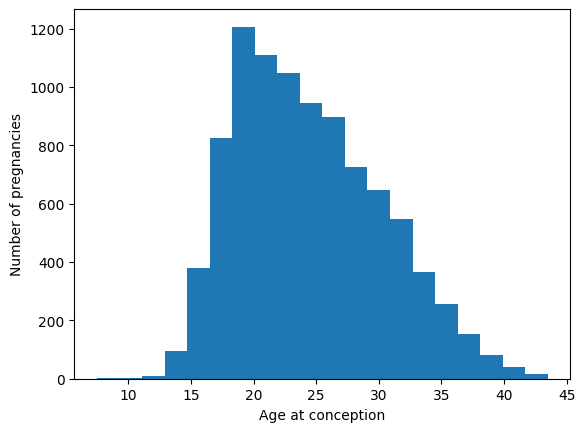

In [43]:
# Plot the histogram
plt.hist(agecon, bins=20)

# Label the axes
plt.xlabel("Age at conception")
plt.ylabel('Number of pregnancies')

Text(0, 0.5, 'Number of pregnancies')

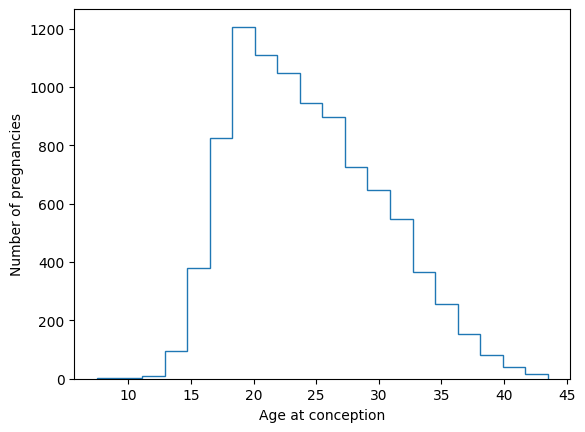

In [44]:
# Plot the histogram
plt.hist(agecon, bins=20, histtype='step')

# Label the axes
plt.xlabel("Age at conception")
plt.ylabel('Number of pregnancies')

### Compute birth weight

In [45]:
def resample_rows_weighted(df, column='wgt2013_2015'):
    """Resamples a DataFrame using probabilities proportional to given column.
    Args:
        df: DataFrame
        column: string column name to use as weights
    returns:
        DataFrame
    """
    weights = df[column].copy()
    weights /= sum(weights)
    indices = np.random.choice(df.index, len(df), replace=True, p=weights)
    sample = df.loc[indices]
    return sample

In [46]:
# Resample the data
nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')

# Clean the weight variables
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

# Compute total birth weight
birth_weight = pounds + ounces/16

In [47]:
# Create a Boolean Series for full-term babies
full_term = nsfg['prglngth'] >= 37

# Select the weights of full-term babies
full_term_weight = birth_weight[full_term]

# Compute the mean weight of full-term babies
print(full_term_weight.mean())

7.424840635661699


### Filter

In [48]:
# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single birth
single = nsfg['nbrnaliv'] == 1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[single & full_term]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[~single & full_term]
print('Multiple full-term mean:', mult_full_term_weight.mean())

Single full-term mean: 7.438189546030023
Multiple full-term mean: 5.5796875


RELATIONSHIPS

In [49]:
!pip install empiricaldist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from empiricaldist import Pmf, Cdf
brfss_original = pd.read_hdf('/content/brfss.hdf5', 'brfss')

Text(0, 0.5, 'PMF')

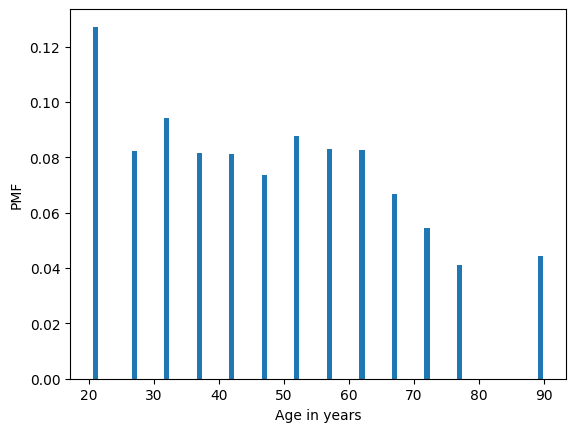

In [50]:
# Extract age
age = Pmf.from_seq(brfss_original['AGE'])

# Plot the PMF
age.bar()

# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')

Text(0, 0.5, 'Weight in kg')

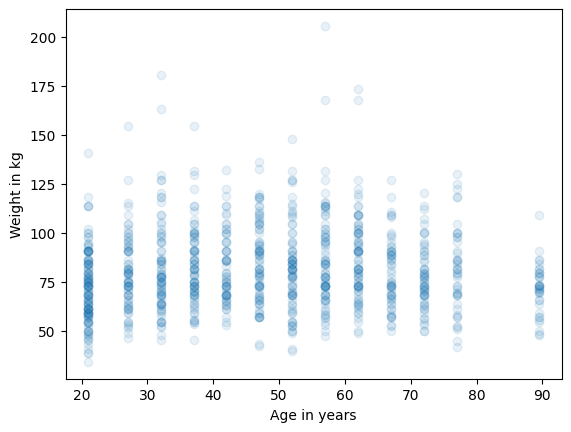

In [51]:
# Select the first 1000 respondents
brfss = brfss_original[:1000]

# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', alpha=0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

Text(0, 0.5, 'Weight in kg')

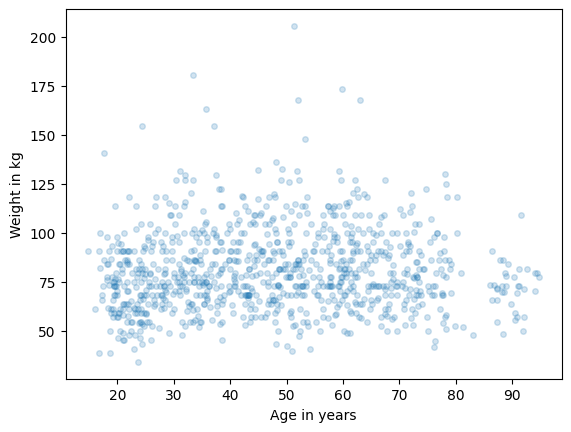

In [52]:
# Select the first 1000 respondents
brfss = brfss_original[:1000]

# Add jittering to age
age = brfss['AGE'] + np.random.normal(0, 2.5, size=len(brfss))
# Extract weight
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', markersize=4, alpha=0.2)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

Text(0, 0.5, 'Weight in kg')

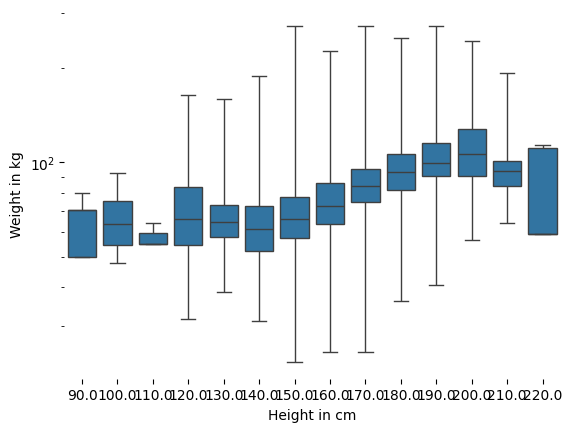

In [53]:
# Drop rows with missing data
data = brfss_original.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(x='_HTMG10', y='WTKG3', data=data, whis=10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

Text(0, 0.5, 'PMF')

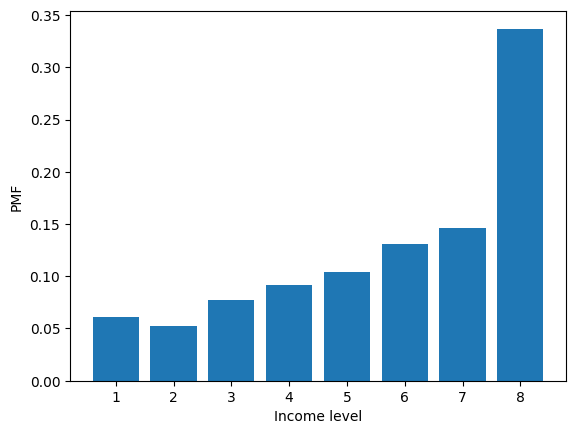

In [54]:
# Extract income
income = brfss_original['INCOME2']

# Plot the PMF
Pmf.from_seq(income).bar()

# Label the axes
plt.xlabel('Income level')
plt.ylabel('PMF')

Text(0, 0.5, 'Height in cm')

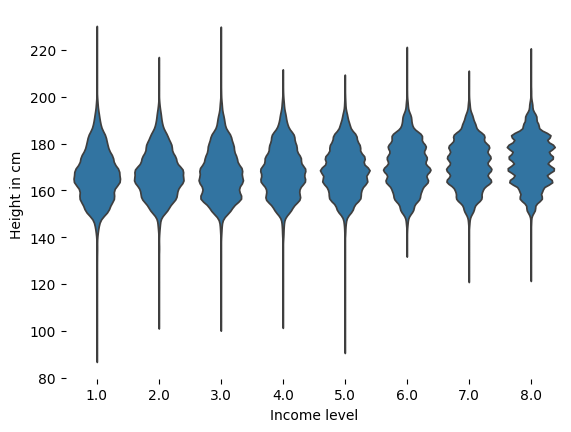

In [55]:
# Drop rows with missing data
data = brfss_original.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot(x = 'INCOME2', y='HTM4', data=data, inner=None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')

In [56]:
# Select columns
columns = ['AGE', 'INCOME2', '_VEGESU1']
subset = brfss_original[columns]

# Compute the correlation matrix
print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.015158 -0.009834
INCOME2  -0.015158  1.000000  0.119670
_VEGESU1 -0.009834  0.119670  1.000000


In [57]:
from scipy.stats import linregress
# Extract the variables
subset = brfss_original.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs, ys)
print(res)

LinregressResult(slope=np.float64(0.06988048092105019), intercept=np.float64(1.5287786243363106), rvalue=np.float64(0.11967005884864107), pvalue=np.float64(1.378503916247615e-238), stderr=np.float64(0.002110976356332332), intercept_stderr=np.float64(0.013196467544093602))


(0.0, 6.0)

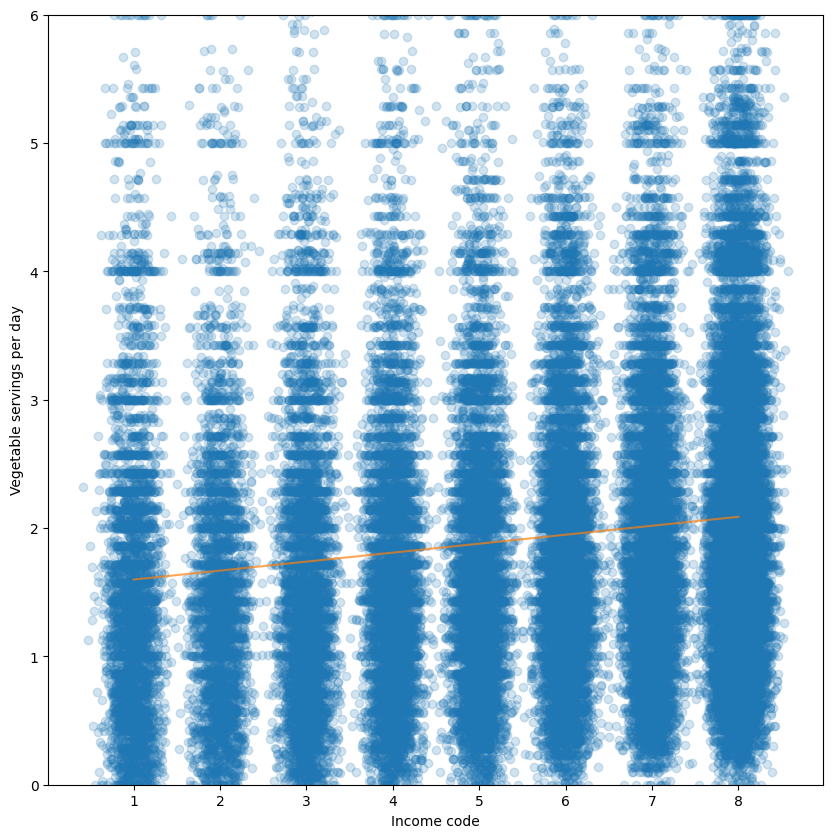

In [58]:
plt.figure(figsize=(10, 10))
# Plot the scatter plot
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])